In [43]:
from joblib import dump, load
from skimage.feature import hog
from skimage import exposure
from sklearn import datasets
from sklearn.svm import LinearSVC
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
print("X: ",X.shape)
print("y: ",y.shape)

X:  (70000, 784)
y:  (70000,)


In [46]:
X = np.array(X, 'int16') 
y = np.array(y, 'int')
print(len(X))
print(X[2].shape)
print(len(y))

70000
(784,)
70000


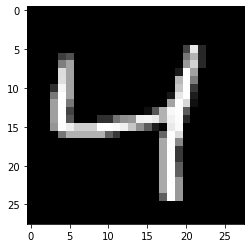

In [47]:
someImage=X[2]
someImage = someImage.reshape([28, 28])
plt.gray()
plt.imshow(someImage)
plt.show()

In [54]:
fd = hog(X[2].reshape((28, 28)), 
         orientations=9, 
         pixels_per_cell=(14, 14), 
         cells_per_block=(1, 1))
fd, hog_image = hog(X[2].reshape((28, 28)), 
                    orientations=9, 
                    pixels_per_cell=(14, 14), 
                    cells_per_block=(1, 1),
                    visualize=True)

In [55]:
fd.shape

(36,)

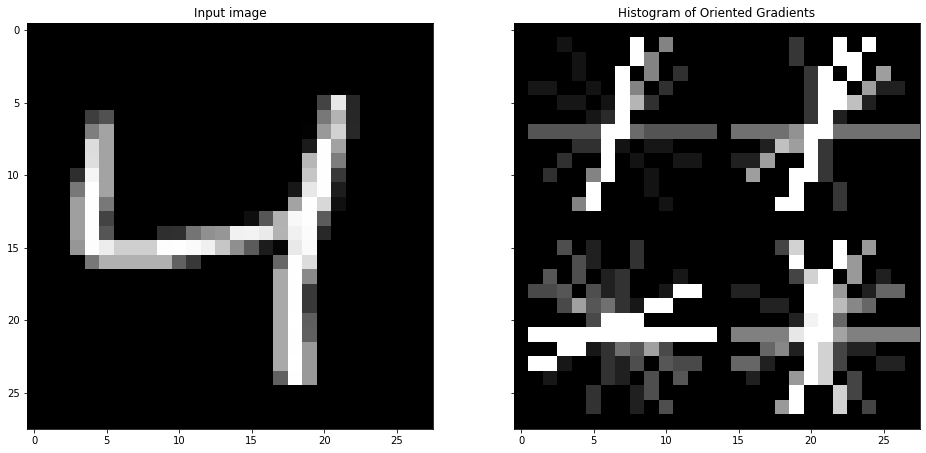

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 
ax1.imshow(features[2].reshape((28, 28)), cmap=plt.cm.gray) 
ax1.set_title('Input image') 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [50]:
fd, hog_image = hog(features[2].reshape((28, 28)), 
                    orientations=9, 
                    pixels_per_cell=(4, 4), 
                    cells_per_block=(2, 2),
                    visualize=True)
fd.shape

(1296,)

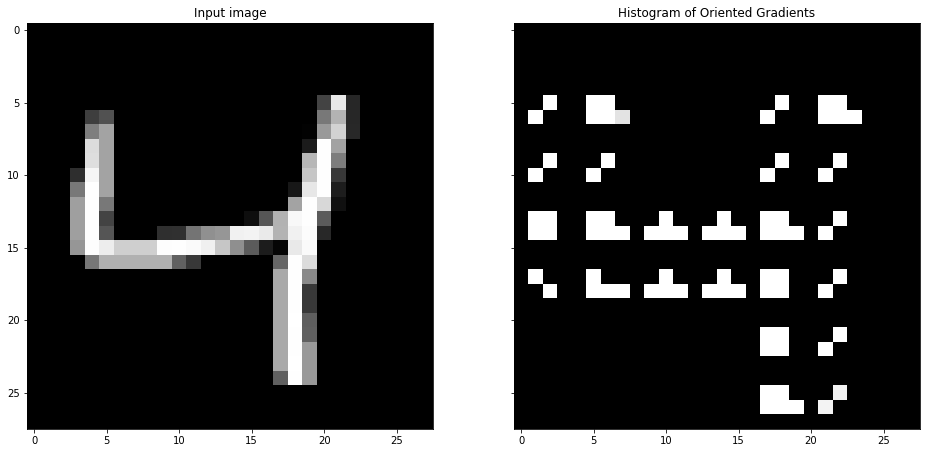

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 
ax1.imshow(features[2].reshape((28, 28)), cmap=plt.cm.gray) 
ax1.set_title('Input image') 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
list_hog_fd = []
for feature in features:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2))
    list_hog_fd.append(fd)

hog_features = np.array(list_hog_fd, 'float64')
print("Count of digits in dataset", Counter(labels))
# Create an linear SVM object
clf = LinearSVC()
# Perform the training
clf.fit(hog_features, labels)
dump(clf, "hog_svm.pkl", compress=3)